In [1181]:
import pandas as pd

In [1182]:
import seaborn as sns

In [1183]:
import matplotlib.pyplot as plt

In [1184]:
import numpy as np

In [1185]:
df= pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/Assignment 1/sales_data.csv')

I'm going to look at the preliminary data to get an idea of what the dataset has, and what needs to be cleaned.

In [1186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [1187]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [1188]:
print(df.head())

      Product    Region   Price  Units Sold   Sale Date
0         NaN  Region_6   75.96        10.0  2022-01-01
1         NaN  Region_1  175.78         8.0  2022-01-02
2  Product_46  Region_3   20.43        12.0  2022-01-03
3  Product_36  Region_1   12.77        10.0  2022-01-04
4  Product_17  Region_6  125.69         6.0  2022-01-05


In [1189]:
print(df.dtypes)

Product        object
Region         object
Price         float64
Units Sold    float64
Sale Date      object
dtype: object


In [1190]:
print(df.describe)

<bound method NDFrame.describe of          Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]>


In [1191]:
print(df.isnull())

      Product  Region  Price  Units Sold  Sale Date
0        True   False  False       False      False
1        True   False  False       False      False
2       False   False  False       False      False
3       False   False  False       False      False
4       False   False  False       False      False
...       ...     ...    ...         ...        ...
1045    False   False  False       False      False
1046    False   False   True       False      False
1047    False   False  False       False      False
1048     True   False   True       False      False
1049    False   False  False       False      False

[1050 rows x 5 columns]


<Axes: xlabel='Units Sold', ylabel='Count'>

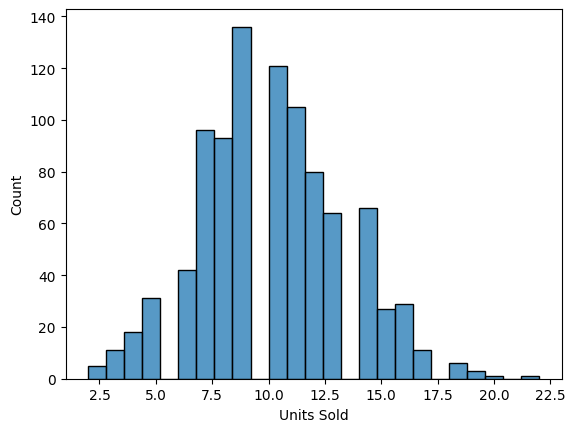

In [1193]:
sns.histplot(df['Units Sold'])

In [1194]:
num_of_products = df['Product'].value_counts()
print(num_of_products)

Product
Product_45    28
Product_5     28
Product_33    27
Product_1     26
Product_13    25
Product_30    24
Product_4     23
Product_43    23
Product_48    23
Product_29    23
Product_23    22
Product_40    22
Product_31    22
Product_37    21
Product_50    21
Product_15    20
Product_44    20
Product_42    20
Product_46    20
Product_19    20
Product_14    20
Product_17    20
Product_16    20
Product_35    19
Product_39    19
Product_41    19
Product_10    19
Product_2     19
Product_6     19
Product_7     18
Product_20    18
Product_28    17
Product_34    17
Product_25    17
Product_22    16
Product_8     16
Product_24    16
Product_32    16
Product_27    16
Product_21    15
Product_9     15
Product_18    14
Product_38    14
Product_11    14
Product_47    13
Product_36    13
Product_26    13
Product_49    13
Product_12    13
Product_3     11
Name: count, dtype: int64


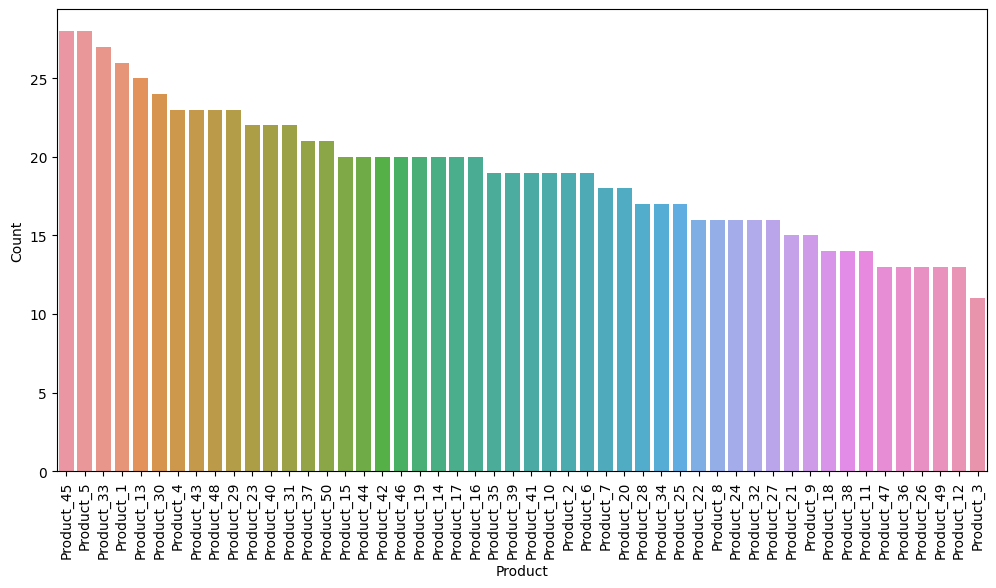

In [1195]:
plt.figure(figsize=(12, 6))
sns.barplot(x=num_of_products.index, y=num_of_products.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

To begin the cleaning process, I want to ensure the values being used make sense. Many of the price entries included values past two decimal points. This doesn't make much sense in regards to pricing values, so I'll round all the values of that column to two decimal places.

In [1196]:
df_clean = df.round({'price': 2})
print(df_clean)

         Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]


In [1197]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [1198]:
print(df_clean)

         Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]


I want to drop any duplicate entries. Any sales accidentally entered twice could really skew the data:

In [1199]:
df_clean.drop_duplicates(inplace=True)

In [1200]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      900 non-null    object 
 2   Price       900 non-null    float64
 3   Units Sold  900 non-null    float64
 4   Sale Date   1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


In [1201]:
print(df_clean)

        Product     Region   Price  Units Sold   Sale Date
0           NaN   Region_6   75.96        10.0  2022-01-01
1           NaN   Region_1  175.78         8.0  2022-01-02
2    Product_46   Region_3   20.43        12.0  2022-01-03
3    Product_36   Region_1   12.77        10.0  2022-01-04
4    Product_17   Region_6  125.69         6.0  2022-01-05
..          ...        ...     ...         ...         ...
995         NaN   Region_7   31.83        13.0  2024-09-22
996  Product_36        NaN   46.19         9.0  2024-09-23
997         NaN   Region_7  311.80        13.0  2024-09-24
998   Product_2  Region_10   43.44        15.0  2024-09-25
999  Product_35   Region_8   56.95         6.0  2024-09-26

[1000 rows x 5 columns]


In [1202]:
df_clean[df_clean['Product'] == 'Product_46']

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
46,Product_46,Region_6,37.44,10.0,2022-02-16
179,Product_46,Region_1,5.81,8.0,2022-06-29
193,Product_46,Region_8,155.11,12.0,2022-07-13
385,Product_46,Region_2,116.38,10.0,2023-01-21
513,Product_46,Region_2,104.48,11.0,2023-05-29
529,Product_46,Region_3,85.10,11.0,2023-06-14
543,Product_46,Region_1,NaN,8.0,2023-06-28
545,Product_46,Region_1,76.66,14.0,2023-06-30
557,Product_46,Region_3,32.69,7.0,2023-07-12


In [1203]:
na_entries = df[df.isna().any(axis=1)]
print(na_entries)

         Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
10    Product_20  Region_3     NaN         8.0  2022-01-11
12     Product_2  Region_3     NaN         6.0  2022-01-13
16    Product_43  Region_6   68.53         NaN  2022-01-17
...          ...       ...     ...         ...         ...
1034  Product_39       NaN   29.22        10.0  2024-07-07
1039  Product_40       NaN    6.83        12.0  2023-02-07
1040  Product_44  Region_9  101.69         NaN  2024-09-11
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1048         NaN  Region_8     NaN         5.0  2023-12-27

[363 rows x 5 columns]


In [1204]:
na_units_sold = df[df['Units Sold'].isna()]
print(na_units_sold)

         Product     Region   Price  Units Sold   Sale Date
16    Product_43   Region_6   68.53         NaN  2022-01-17
62     Product_5  Region_10   71.01         NaN  2022-03-04
81    Product_23   Region_5    9.93         NaN  2022-03-23
86     Product_5   Region_6   44.88         NaN  2022-03-28
93    Product_29   Region_6   87.63         NaN  2022-04-04
...          ...        ...     ...         ...         ...
990          NaN   Region_2     NaN         NaN  2024-09-17
1005  Product_15        NaN   59.91         NaN  2022-05-17
1012  Product_40   Region_8   92.70         NaN  2023-05-17
1013  Product_22   Region_9  141.53         NaN  2022-05-26
1040  Product_44   Region_9  101.69         NaN  2024-09-11

[104 rows x 5 columns]


Checking to see how many times 'Units Sold' has NA value:

In [1205]:
na_units_sold_count = df['Units Sold'].isna().sum()
print(na_units_sold_count)


104


In [1206]:
na_price = df[df['Price'].isna()]
print(na_price)

         Product    Region  Price  Units Sold   Sale Date
10    Product_20  Region_3    NaN         8.0  2022-01-11
12     Product_2  Region_3    NaN         6.0  2022-01-13
51    Product_17  Region_5    NaN        12.0  2022-02-21
59    Product_12  Region_8    NaN         7.0  2022-03-01
63    Product_33       NaN    NaN         6.0  2022-03-05
...          ...       ...    ...         ...         ...
1002  Product_13  Region_3    NaN         8.0  2022-04-05
1006  Product_41  Region_3    NaN        18.0  2023-01-26
1028  Product_42  Region_6    NaN         8.0  2024-01-19
1046   Product_1  Region_6    NaN         8.0  2022-08-02
1048         NaN  Region_8    NaN         5.0  2023-12-27

[105 rows x 5 columns]


In [1207]:
null_price_count = df_clean['Price'].isnull().sum()
print("Number of null entries in 'Price' column:", null_price_count)

Number of null entries in 'Price' column: 100


In order to fill some of the missing 'Price' column entries, the ones that had a product listed, I want to fill the price value with the average of the price of that corresponding product:

In [1208]:
df_clean['Price'].fillna(df_clean.groupby('Product')['Price'].transform('mean'), inplace=True)

In [1209]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      900 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  900 non-null    float64
 4   Sale Date   1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


Now I'll check to see how many null Price's remain:

In [1210]:
null_price_count = df_clean['Price'].isnull().sum()
print(null_price_count)

11


In [1211]:
df_clean[df_clean['Price'].isnull()]

,Product,Region,Price,Units Sold,Sale Date
91,NaN,Region_5,NaN,14.0,2022-04-02
224,NaN,Region_8,NaN,7.0,2022-08-13
272,NaN,NaN,NaN,NaN,2022-09-30
307,NaN,Region_8,NaN,5.0,2022-11-04
412,NaN,Region_10,NaN,9.0,2023-02-17
664,NaN,Region_10,NaN,14.0,2023-10-27
725,NaN,Region_8,NaN,5.0,2023-12-27
740,NaN,Region_5,NaN,10.0,2024-01-11
826,NaN,Region_10,NaN,13.0,2024-04-06
966,NaN,Region_2,NaN,13.0,2024-08-24


Because the remaining NaN price data also has NaN product information, and there's only 11 entries that this applies to, I will remove them from the data as it wouldn't impact the overall results much at all.

In [1212]:
df_clean.dropna(subset=['Price'], inplace=True)

In [1213]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      890 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  891 non-null    float64
 4   Sale Date   989 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.4+ KB


In [1214]:
print(df_clean.describe(include='all'))


          Product    Region        Price  Units Sold   Sale Date
count         900       890   989.000000  891.000000         989
unique         50        10          NaN         NaN         989
top     Product_5  Region_9          NaN         NaN  2022-01-01
freq           28       104          NaN         NaN           1
mean          NaN       NaN   106.543353   10.068462         NaN
std           NaN       NaN   118.608495    3.162779         NaN
min           NaN       NaN     0.200000    2.000000         NaN
25%           NaN       NaN    32.690000    8.000000         NaN
50%           NaN       NaN    83.006842   10.000000         NaN
75%           NaN       NaN   138.050000   12.000000         NaN
max           NaN       NaN  2143.300000   22.000000         NaN


In [1215]:
print(df.describe(include='all'))

           Product    Region        Price  Units Sold   Sale Date
count          947       946   945.000000  946.000000        1050
unique          50        10          NaN         NaN        1000
top     Product_45  Region_9          NaN         NaN  2022-07-28
freq            28       109          NaN         NaN           2
mean           NaN       NaN   107.598688   10.048626         NaN
std            NaN       NaN   124.020322    3.172261         NaN
min            NaN       NaN     0.200000    2.000000         NaN
25%            NaN       NaN    29.430000    8.000000         NaN
50%            NaN       NaN    78.130000   10.000000         NaN
75%            NaN       NaN   142.570000   12.000000         NaN
max            NaN       NaN  2143.300000   22.000000         NaN


When looking at the two DataFrames, there seems to be an outlier in price, so I'm going to check that visually using a scatter plot:

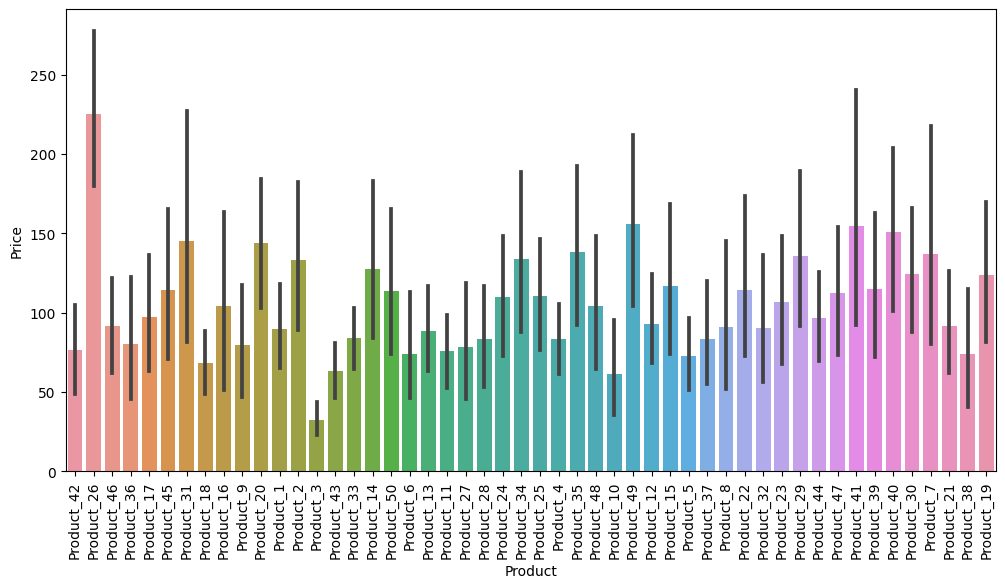

In [1270]:
plt.figure(figsize=(12, 6))
sns.barplot(data= df_clean, x = 'Product', y = 'Price')
plt.xticks(rotation=90)
plt.show()

Now I want to check to see which entry is causing the outlier:

In [1217]:
df_clean[df_clean['Price'] > 1000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


Because this price was likely incorreclty input, I can check the average price of the other Product_15 sales, and replace this data with that average:

In [1218]:
product_15_mean_price = df_clean[(df_clean['Product'] == 'Product_15') & (df_clean['Price'] < 2000)]['Price'].mean()
product_15_mean_price.round(2)


116.89

I will now replace the outlier price value with the mean we found for the prices of the other product_15 entries:

In [1219]:
df_clean.loc[(df_clean['Product'] == 'Product_15') & (df_clean['Price'] > 2000), 'Price'] = product_15_mean_price.round(2)

I'll now check to see how the scatterplot improved:

<Axes: xlabel='Product', ylabel='Price'>

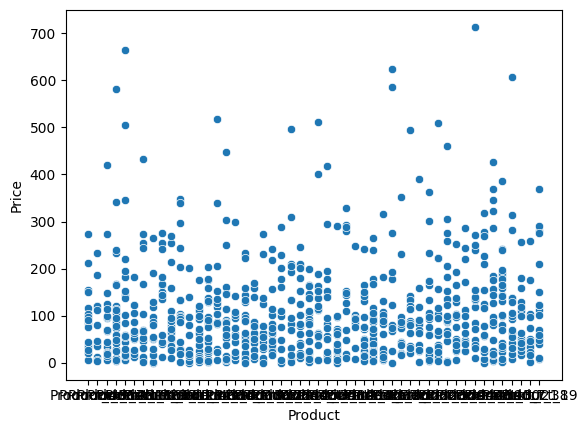

In [1220]:
sns.scatterplot(data= df_clean, x = 'Product', y = 'Price')

Now I want to check that nothing odd has happened with the data from the original dataframe.

In [1221]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      890 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  891 non-null    float64
 4   Sale Date   989 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.4+ KB


In [1222]:
df_clean.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,900,890,989.000000,891.000000,989
unique,50,10,NaN,NaN,989
top,Product_5,Region_9,NaN,NaN,2022-01-01
freq,28,104,NaN,NaN,1
mean,NaN,NaN,104.494404,10.068462,NaN
std,NaN,NaN,99.323301,3.162779,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,32.690000,8.000000,NaN
50%,NaN,NaN,83.006842,10.000000,NaN
75%,NaN,NaN,137.660000,12.000000,NaN


In [1223]:
df.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [1224]:
df_clean_group_product = df_clean.groupby('Product').apply(lambda x: x.reset_index(drop=True))


In [1225]:
print(df_clean_group_product[df_clean_group_product['Product'] == 'Product_2'])

                Product     Region       Price  Units Sold   Sale Date
Product                                                               
Product_2 0   Product_2   Region_3  133.226875         6.0  2022-01-13
          1   Product_2   Region_9  296.030000        13.0  2022-02-06
          2   Product_2   Region_2    2.140000         7.0  2022-03-22
          3   Product_2   Region_1   29.390000        16.0  2022-04-21
          4   Product_2   Region_1  102.290000        17.0  2022-06-12
          5   Product_2        NaN  104.480000         8.0  2022-06-15
          6   Product_2   Region_8   26.560000        13.0  2022-06-20
          7   Product_2   Region_3  242.770000         7.0  2022-10-17
          8   Product_2   Region_3   99.020000         4.0  2022-12-16
          9   Product_2   Region_2  203.410000         9.0  2022-12-26
          10  Product_2   Region_9   96.340000        14.0  2023-02-22
          11  Product_2   Region_4  347.200000         NaN  2023-05-04
      

Reviewing the individual product data as a group may help me to think of methods to fill some of the remaining missing data. Seems as though for missing units sold, it would be appropriate to calculate the average order size per product and assume that amount was sold when there's no entry.

In [1226]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      890 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  891 non-null    float64
 4   Sale Date   989 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.4+ KB


In [1227]:
print(df_clean[df_clean['Units Sold'].isnull()])

        Product     Region   Price  Units Sold   Sale Date
16   Product_43   Region_6   68.53         NaN  2022-01-17
62    Product_5  Region_10   71.01         NaN  2022-03-04
81   Product_23   Region_5    9.93         NaN  2022-03-23
86    Product_5   Region_6   44.88         NaN  2022-03-28
93   Product_29   Region_6   87.63         NaN  2022-04-04
..          ...        ...     ...         ...         ...
968  Product_45  Region_10    5.48         NaN  2024-08-26
971  Product_11   Region_5   77.22         NaN  2024-08-29
979  Product_21   Region_8  118.93         NaN  2024-09-06
984  Product_44   Region_9  101.69         NaN  2024-09-11
988  Product_42   Region_9  240.97         NaN  2024-09-15

[98 rows x 5 columns]


In [1228]:
df_clean['Units Sold'].fillna(df_clean.groupby('Product')['Units Sold'].transform('mean'), inplace=True)

In [1229]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      890 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  982 non-null    float64
 4   Sale Date   989 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.4+ KB


In [1230]:
print(df_clean[df_clean['Units Sold'].isnull()])

    Product     Region   Price  Units Sold   Sale Date
301     NaN   Region_2  133.75         NaN  2022-10-29
340     NaN   Region_1   36.82         NaN  2022-12-07
567     NaN   Region_4  266.88         NaN  2023-07-22
806     NaN   Region_9    7.58         NaN  2024-03-17
817     NaN   Region_3  101.54         NaN  2024-03-28
851     NaN  Region_10  195.71         NaN  2024-05-01
872     NaN  Region_10  135.39         NaN  2024-05-22


These remaining 7 entries have no Product or Units Sold data, so I'll go ahead and drop these from our DataFrame

In [1231]:
null_units_sold = df_clean[df_clean['Units Sold'].isnull()]
null_units_sold_indexes = null_units_sold.index
df_clean.drop(null_units_sold_indexes, inplace=True)

In [1232]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    float64
 4   Sale Date   982 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.0+ KB


In [1233]:
df_clean.describe(include='all')


,Product,Region,Price,Units Sold,Sale Date
count,900,883,982.000000,982.000000,982
unique,50,10,NaN,NaN,982
top,Product_5,Region_9,NaN,NaN,2022-01-01
freq,28,103,NaN,NaN,1
mean,NaN,NaN,104.345515,10.061387,NaN
std,NaN,NaN,99.418463,3.025656,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,32.555000,8.000000,NaN
50%,NaN,NaN,82.650000,10.000000,NaN
75%,NaN,NaN,137.615000,12.000000,NaN


In [1234]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [1235]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    float64
 4   Sale Date   982 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.0+ KB


In [1236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [1237]:
df_clean['Units Sold'] = df_clean['Units Sold'].astype(int)

In [1238]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    int64  
 4   Sale Date   982 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 46.0+ KB


In [1239]:
product_is_null = df_clean[df_clean['Product'].isnull()]

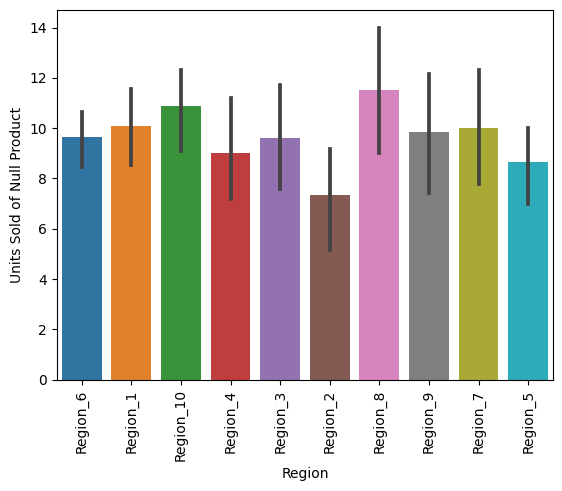

In [1265]:
sns.barplot(data=product_is_null, x='Region', y='Units Sold')
plt.xticks(rotation=90)
plt.ylabel('Units Sold of Null Product')
plt.show()

To enable further analysis, I want to add a column to my DataFrame called 'Revenue' which would simply be the product of price and units sold:

In [1241]:
df_clean['Revenue'] = df_clean['Price'] * df_clean['Units Sold']

In [1242]:
df_clean

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10,2022-01-01,759.60
1,NaN,Region_1,175.78,8,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12,2022-01-03,245.16
3,Product_36,Region_1,12.77,10,2022-01-04,127.70
4,Product_17,Region_6,125.69,6,2022-01-05,754.14
...,...,...,...,...,...,...
995,NaN,Region_7,31.83,13,2024-09-22,413.79
996,Product_36,NaN,46.19,9,2024-09-23,415.71
997,NaN,Region_7,311.80,13,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15,2024-09-25,651.60


I now want to review the entries that have no product information to decide how to handle this data clean up. 

In [1243]:
product_is_null = df_clean[df_clean['Product'].isnull()]

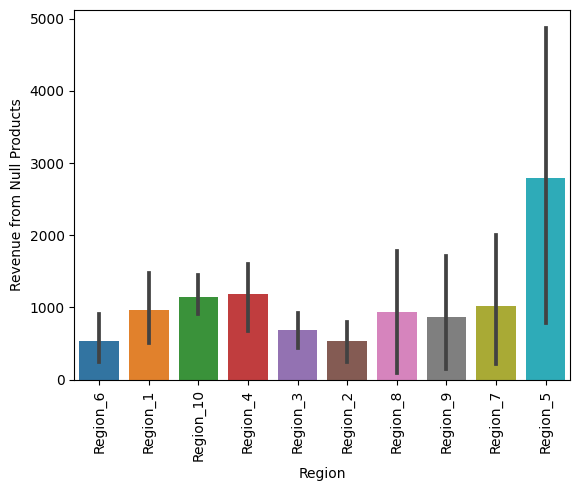

In [1244]:
sns.barplot(data=product_is_null, x='Region', y='Revenue')
plt.xticks(rotation=90)
plt.ylabel('Revenue from Null Products')
plt.show()

This plot shows that Region_5 has a lot of revenue coming from sales where the Product was not marked down. Because it's significant, I want to find a way to fill in these null entries that will maintain the credibility of the data.

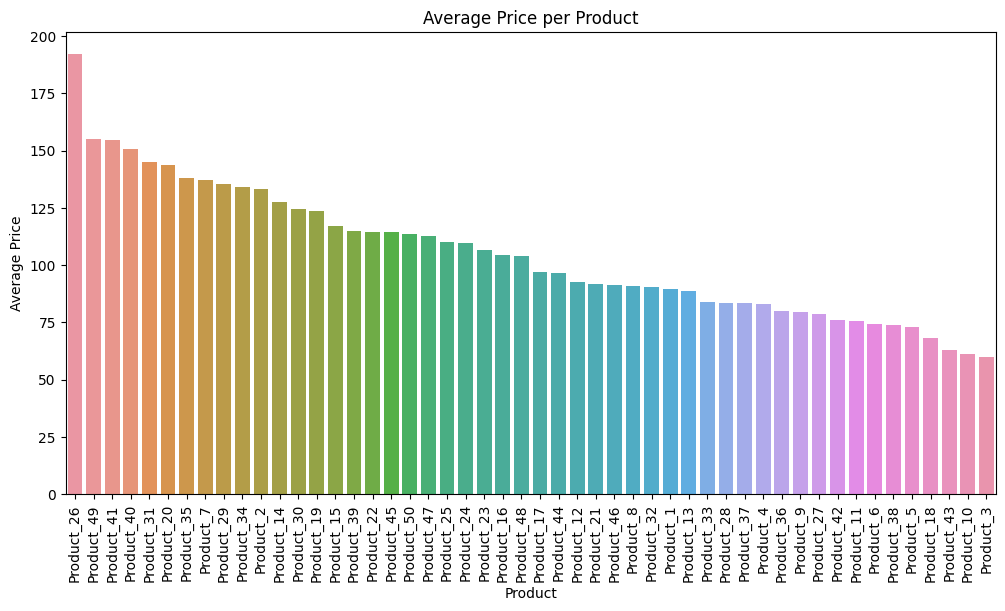

In [1245]:

avg_price = df_clean.groupby('Product')['Price'].mean().reset_index()
avg_price_sorted = avg_price.sort_values(by='Price', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_sorted, x='Product', y='Price')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.title('Average Price per Product')
plt.xticks(rotation=90)
plt.show()



With the information about the average price of each individual product, we could look to fill the missing product data in the DataFrame by assuming the product sold was the product with the average sale price closest to the sale price of the sale entered.

In [1246]:
print(avg_price_sorted)

       Product       Price
18  Product_26  192.085455
43  Product_49  155.083846
35  Product_41  154.682000
34  Product_40  150.797000
24  Product_31  145.119524
12  Product_20  143.814167
28  Product_35  138.106250
47   Product_7  137.210714
21  Product_29  135.385789
27  Product_34  133.865000
11   Product_2  133.226875
5   Product_14  127.552778
23  Product_30  124.420000
10  Product_19  123.740000
6   Product_15  116.885509
32  Product_39  114.698889
14  Product_22  114.403333
39  Product_45  114.275417
45  Product_50  113.543333
41  Product_47  112.509167
17  Product_25  110.250000
16  Product_24  109.566923
15  Product_23  106.473000
7   Product_16  104.196471
42  Product_48  103.952000
8   Product_17   96.859412
38  Product_44   96.577857
3   Product_12   92.660000
13  Product_21   91.728667
40  Product_46   91.196250
48   Product_8   90.796429
25  Product_32   90.475000
0    Product_1   89.652857
4   Product_13   88.530000
26  Product_33   83.993750
20  Product_28   83.395333
3

In [1247]:
print(df_clean[df_clean['Product'].isnull()])

    Product     Region   Price  Units Sold   Sale Date  Revenue
0       NaN   Region_6   75.96          10  2022-01-01   759.60
1       NaN   Region_1  175.78           8  2022-01-02  1406.24
18      NaN        NaN  276.27           9  2022-01-19  2486.43
21      NaN        NaN   46.10          14  2022-01-22   645.40
27      NaN  Region_10  193.85          10  2022-01-28  1938.50
..      ...        ...     ...         ...         ...      ...
987     NaN   Region_4   31.66           6  2024-09-14   189.96
989     NaN   Region_5  303.51           9  2024-09-16  2731.59
992     NaN  Region_10  151.70          10  2024-09-19  1517.00
995     NaN   Region_7   31.83          13  2024-09-22   413.79
997     NaN   Region_7  311.80          13  2024-09-24  4053.40

[82 rows x 6 columns]


In [1248]:
df_clean.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date,Revenue
count,900,883,982.000000,982.000000,982,982.000000
unique,50,10,NaN,NaN,982,NaN
top,Product_5,Region_9,NaN,NaN,2022-01-01,NaN
freq,28,103,NaN,NaN,1,NaN
mean,NaN,NaN,104.345515,10.016293,NaN,1031.486946
std,NaN,NaN,99.418463,3.030887,NaN,1053.461390
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,32.555000,8.000000,NaN,292.530000
50%,NaN,NaN,82.650000,10.000000,NaN,767.160000
75%,NaN,NaN,137.615000,12.000000,NaN,1372.002857


In [1249]:
units_sold_table = df_clean.groupby('Product')['Units Sold'].count().reset_index()
units_sold_table.columns = ['Product', 'Units Sold']
print(units_sold_table)

       Product  Units Sold
0    Product_1          24
1   Product_10          16
2   Product_11          14
3   Product_12          13
4   Product_13          24
5   Product_14          19
6   Product_15          19
7   Product_16          18
8   Product_17          18
9   Product_18          14
10  Product_19          20
11   Product_2          19
12  Product_20          15
13  Product_21          15
14  Product_22          15
15  Product_23          21
16  Product_24          16
17  Product_25          17
18  Product_26          12
19  Product_27          16
20  Product_28          16
21  Product_29          20
22   Product_3          11
23  Product_30          23
24  Product_31          21
25  Product_32          16
26  Product_33          27
27  Product_34          17
28  Product_35          19
29  Product_36          13
30  Product_37          19
31  Product_38          13
32  Product_39          18
33   Product_4          23
34  Product_40          20
35  Product_41          17
3

In [1250]:
def find_closest_product(price):
    differences = np.abs(avg_price['Price'] - price)
    closest_index = differences.idxmin()
    return avg_price.loc[closest_index, 'Product']

df_clean['Product'] = df_clean.apply(lambda row: find_closest_product(row['Price'])
                                     if pd.isnull(row['Product']) else row['Product'], axis=1)


In [1251]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     982 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    int64  
 4   Sale Date   982 non-null    object 
 5   Revenue     982 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 53.7+ KB


We can now see that all missing values other than 99 Region fiels has been filled. I want to review the summary data to ensure nothing major has changed from the original DataFrame:

In [1252]:
df_clean.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date,Revenue
count,982,883,982.000000,982.000000,982,982.000000
unique,50,10,NaN,NaN,982,NaN
top,Product_3,Region_9,NaN,NaN,2022-01-01,NaN
freq,46,103,NaN,NaN,1,NaN
mean,NaN,NaN,104.345515,10.016293,NaN,1031.486946
std,NaN,NaN,99.418463,3.030887,NaN,1053.461390
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,32.555000,8.000000,NaN,292.530000
50%,NaN,NaN,82.650000,10.000000,NaN,767.160000
75%,NaN,NaN,137.615000,12.000000,NaN,1372.002857


In [1253]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [1254]:
units_sold_table = df_clean.groupby('Product')['Units Sold'].sum().reset_index()
units_sold_table.columns = ['Product', 'Units Sold']
print(units_sold_table)


       Product  Units Sold
0    Product_1         237
1   Product_10         180
2   Product_11         166
3   Product_12         139
4   Product_13         253
5   Product_14         221
6   Product_15         219
7   Product_16         185
8   Product_17         201
9   Product_18         180
10  Product_19         200
11   Product_2         201
12  Product_20         153
13  Product_21         184
14  Product_22         145
15  Product_23         216
16  Product_24         170
17  Product_25         159
18  Product_26         285
19  Product_27         172
20  Product_28         166
21  Product_29         198
22   Product_3         473
23  Product_30         247
24  Product_31         209
25  Product_32         145
26  Product_33         269
27  Product_34         196
28  Product_35         197
29  Product_36         113
30  Product_37         182
31  Product_38         119
32  Product_39         163
33   Product_4         243
34  Product_40         203
35  Product_41         176
3

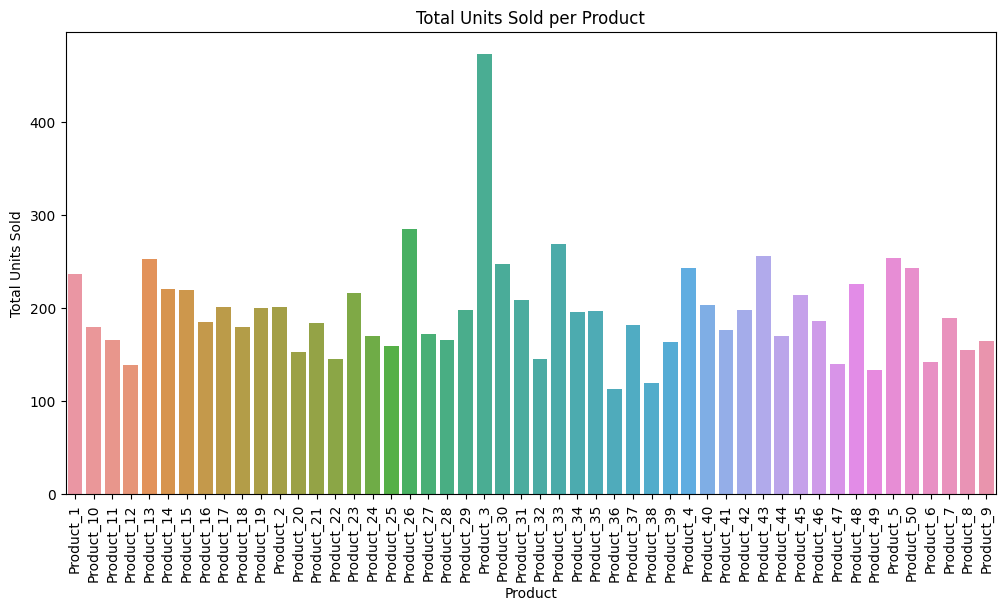

In [1255]:
plt.figure(figsize=(12, 6))
sns.barplot(data=units_sold_table, x='Product', y='Units Sold')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold per Product')
plt.xticks(rotation=90)
plt.show()

In [1256]:
print(df_clean[df_clean['Region'].isnull()])

        Product Region   Price  Units Sold   Sale Date  Revenue
18   Product_26    NaN  276.27           9  2022-01-19  2486.43
21    Product_3    NaN   46.10          14  2022-01-22   645.40
43   Product_35    NaN  112.27           4  2022-02-13   449.08
54   Product_12    NaN   96.49          16  2022-02-24  1543.84
57    Product_3    NaN   30.71          12  2022-02-27   368.52
..          ...    ...     ...         ...         ...      ...
949  Product_11    NaN  169.51           9  2024-08-07  1525.59
973  Product_48    NaN   51.00          10  2024-08-31   510.00
975  Product_33    NaN    3.21          10  2024-09-02    32.10
991  Product_21    NaN   41.93          15  2024-09-18   628.95
996  Product_36    NaN   46.19           9  2024-09-23   415.71

[99 rows x 6 columns]


In [1257]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     982 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    int64  
 4   Sale Date   982 non-null    object 
 5   Revenue     982 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 53.7+ KB


In [1258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


For the remainder of the miussing region data, i'm going to fill with 'Other'. 

In [1259]:
df_clean['Region'] = df_clean['Region'].fillna('Unknown Region')

In [1260]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     982 non-null    object 
 1   Region      982 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    int64  
 4   Sale Date   982 non-null    object 
 5   Revenue     982 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 53.7+ KB


In [1261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [1262]:
df_clean.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date,Revenue
count,982,982,982.000000,982.000000,982,982.000000
unique,50,11,NaN,NaN,982,NaN
top,Product_3,Region_9,NaN,NaN,2022-01-01,NaN
freq,46,103,NaN,NaN,1,NaN
mean,NaN,NaN,104.345515,10.016293,NaN,1031.486946
std,NaN,NaN,99.418463,3.030887,NaN,1053.461390
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,32.555000,8.000000,NaN,292.530000
50%,NaN,NaN,82.650000,10.000000,NaN,767.160000
75%,NaN,NaN,137.615000,12.000000,NaN,1372.002857


In [1263]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


<Axes: xlabel='Units Sold', ylabel='Count'>

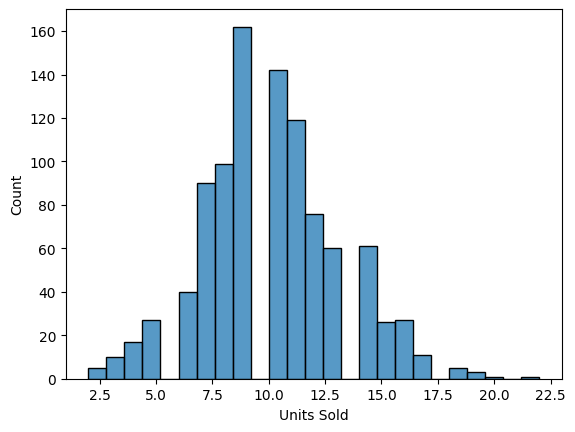

In [1274]:
sns.histplot(df_clean['Units Sold'])

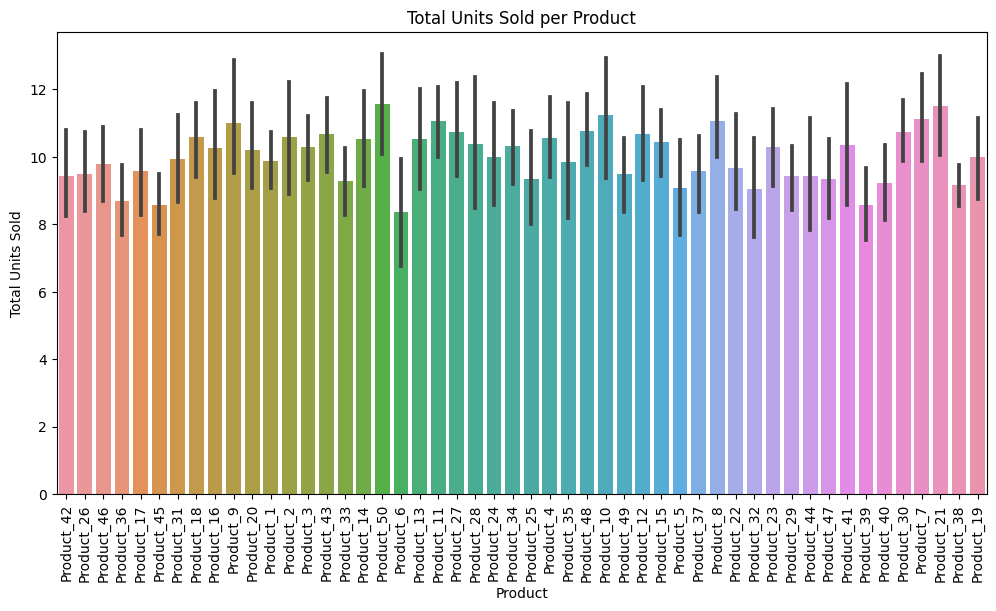

In [1280]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_clean, x='Product', y='Units Sold')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold per Product')
plt.xticks(rotation=90)
plt.show()

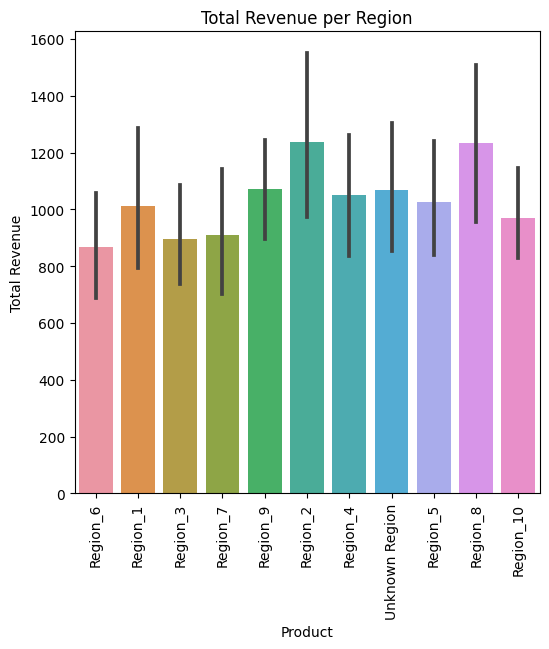

In [1288]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df_clean, x='Region', y='Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Region')
plt.xticks(rotation=90)
plt.show()